# **The California Dream Real Estate Co**

**California Housing Dataset**

The California Housing Dataset is a classic dataset often used for regression tasks in machine learning. It is derived from the 1990 U.S. Census and is designed to help analyse and predict housing values in California. The dataset includes various features that describe different aspects of housing and demographics for block groups in California.

### **Step 1: Import Libraries, mount Google Drive and read the CSV File**

**Import Libraries**

Here, we import various libraries needed for data manipulation (pandas, numpy), visualization (matplotlib, seaborn, plotly), and machine learning tasks (sklearn).

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
from sklearn.decomposition import PCA

**Mount Google Drive**

The below command mounts the Google Drive to Colab, allowing access to files stored in the Drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Read the CSV File**

Here, the path to the CSV file in Google Drive is sepcified and loaded into a pandas DataFrame.

In [ ]:
# Specify the path to the CSV file on your Google Drive
file_path = '/content/drive/MyDrive/Oxford Summit/housing.csv'

In [ ]:
# Read the CSV file into a DataFrame
housing_data = pd.read_csv(file_path)

### **Step 2: Exploratory Data Analysis**

In [ ]:
print(f'DataFrame size: {housing_data.shape}')

DataFrame size: (20640, 10)


There are **20640** rows and **13** columns.

In [ ]:
# Display the first few rows of the DataFrame to verify
print(housing_data.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


This line provides a concise summary of the DataFrame, including the number of non-null values and data types for each column.

In [ ]:
# Display basic information about the dataset
# Print a concise summary of the DataFrame, including the number of non-null values and data types.
print(housing_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


We notice from the above table, that the column 'total_bedrooms' has null values and verify with the below python code - **207** rows.

In [ ]:
housing_data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

**Summary Statistics**

The below command provides summary statistics for the dataset, such as mean, median, and standard deviation for numerical columns.

In [ ]:
# Display summary statistics of the dataset
print(housing_data.describe())

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

In [ ]:
# List of numeric columns to plot
numeric_columns = [
    "longitude", "latitude", "housing_median_age",
    "total_rooms", "total_bedrooms", "population",
    "households", "median_income", "median_house_value"
]

### **Visualization**

In [ ]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

This section generates histograms for all numerical columns to understand their distributions.

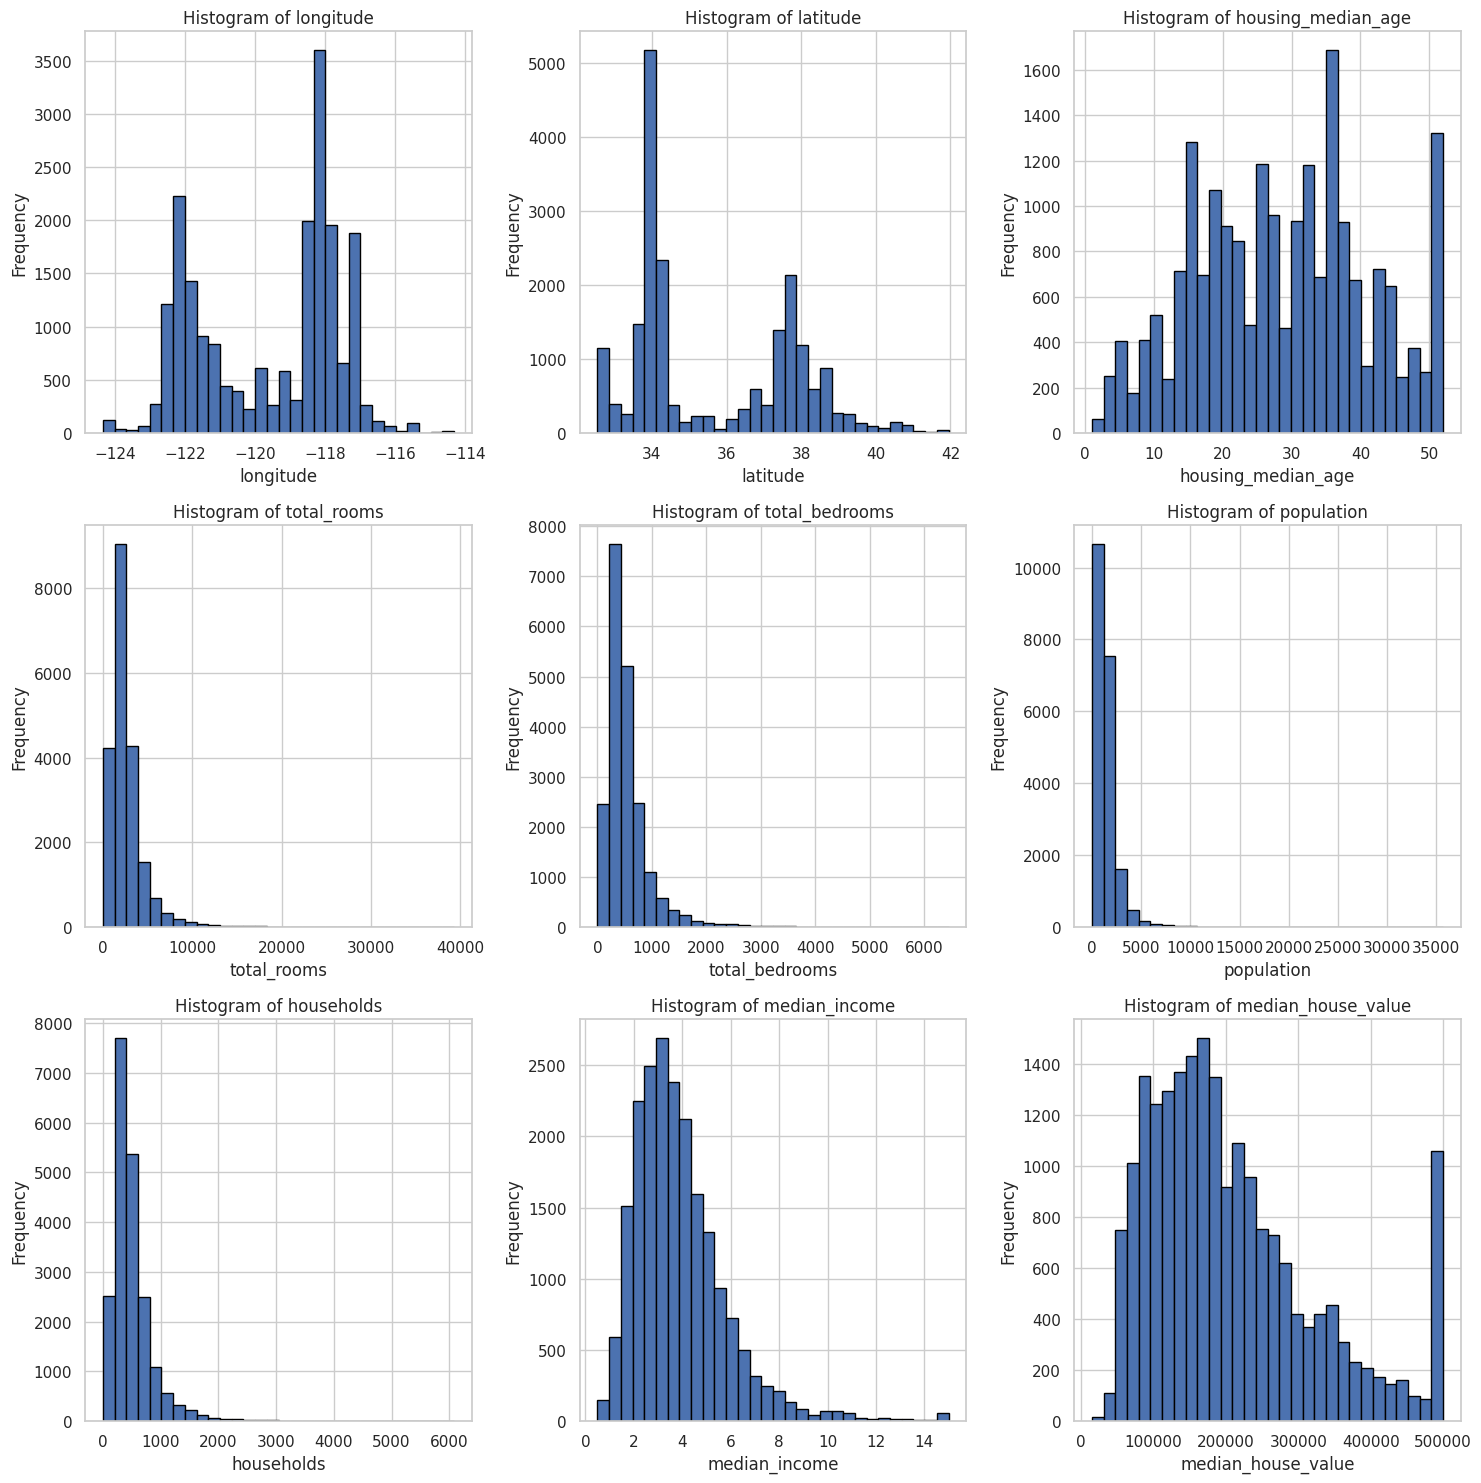

In [ ]:
# Set up plotting area to display multiple histograms
plt.figure(figsize=(15, 15))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    plt.hist(housing_data[column], bins=30, edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

The below code generates a correlation matrix to visualize the correlation between different features in the dataset.

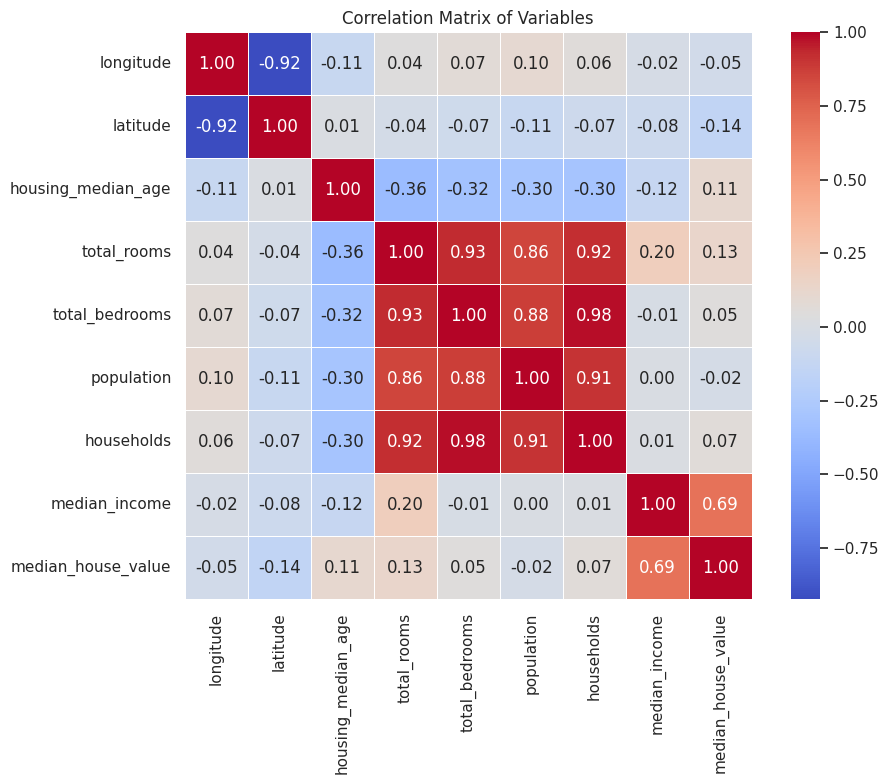

In [ ]:
# Correlation matrix
corr_matrix = housing_data.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, square=True)
plt.title('Correlation Matrix of Variables')
plt.tight_layout()
plt.show()

This line creates a scatter plot with a trend line to show the relationship between median income and median house value.

In [ ]:
fig = px.scatter(housing_data, x="median_income", y="median_house_value", trendline="ols", color_discrete_sequence=['steelbl'], title='<b>Median House Value vs Median Income', color='median_house_value', color_continuous_scale=px.colors.sequential.Oranges)
fig.update_layout(title_x=0.5)
fig.show()

The scatter plot visualizes the relationship between the median income and the median house value in a dataset. Here are the key insights from the scatter plot:

Positive Correlation: There is a positive correlation between median income and median house value, as indicated by the upward trend of the scatter points and the red trend line. This means that, generally, as median income increases, the median house value also increases.

Color Intensity: The color intensity of the points indicates the density of data points. Darker colors represent a higher concentration of data points, while lighter colors represent fewer data points.

There is a higher concentration of data points at lower median incomes and lower median house values, indicating that most data points fall within this range.
Cap on Median House Value: There is a noticeable horizontal line at around 500k for median house value. This suggests that the data might be capped at this value, likely due to a limitation or truncation in the dataset. Many data points are clustered at this cap, indicating that numerous values might have been set to this upper limit.

Spread of Data:

For lower median incomes (0 to 4), the median house values show a wide range, from low to high.
For higher median incomes (above 8), the median house values tend to be higher but less varied, suggesting that higher incomes consistently correspond to higher house values.
Outliers: There are fewer data points for very high median incomes (above 10), indicating that such high-income values are less common in the dataset.

This scatter plot effectively shows the general trend that higher incomes are associated with higher house values, with a significant data cap at around 500k for median house value.

This generates a pair plot to visualize relationships between all numerical features.

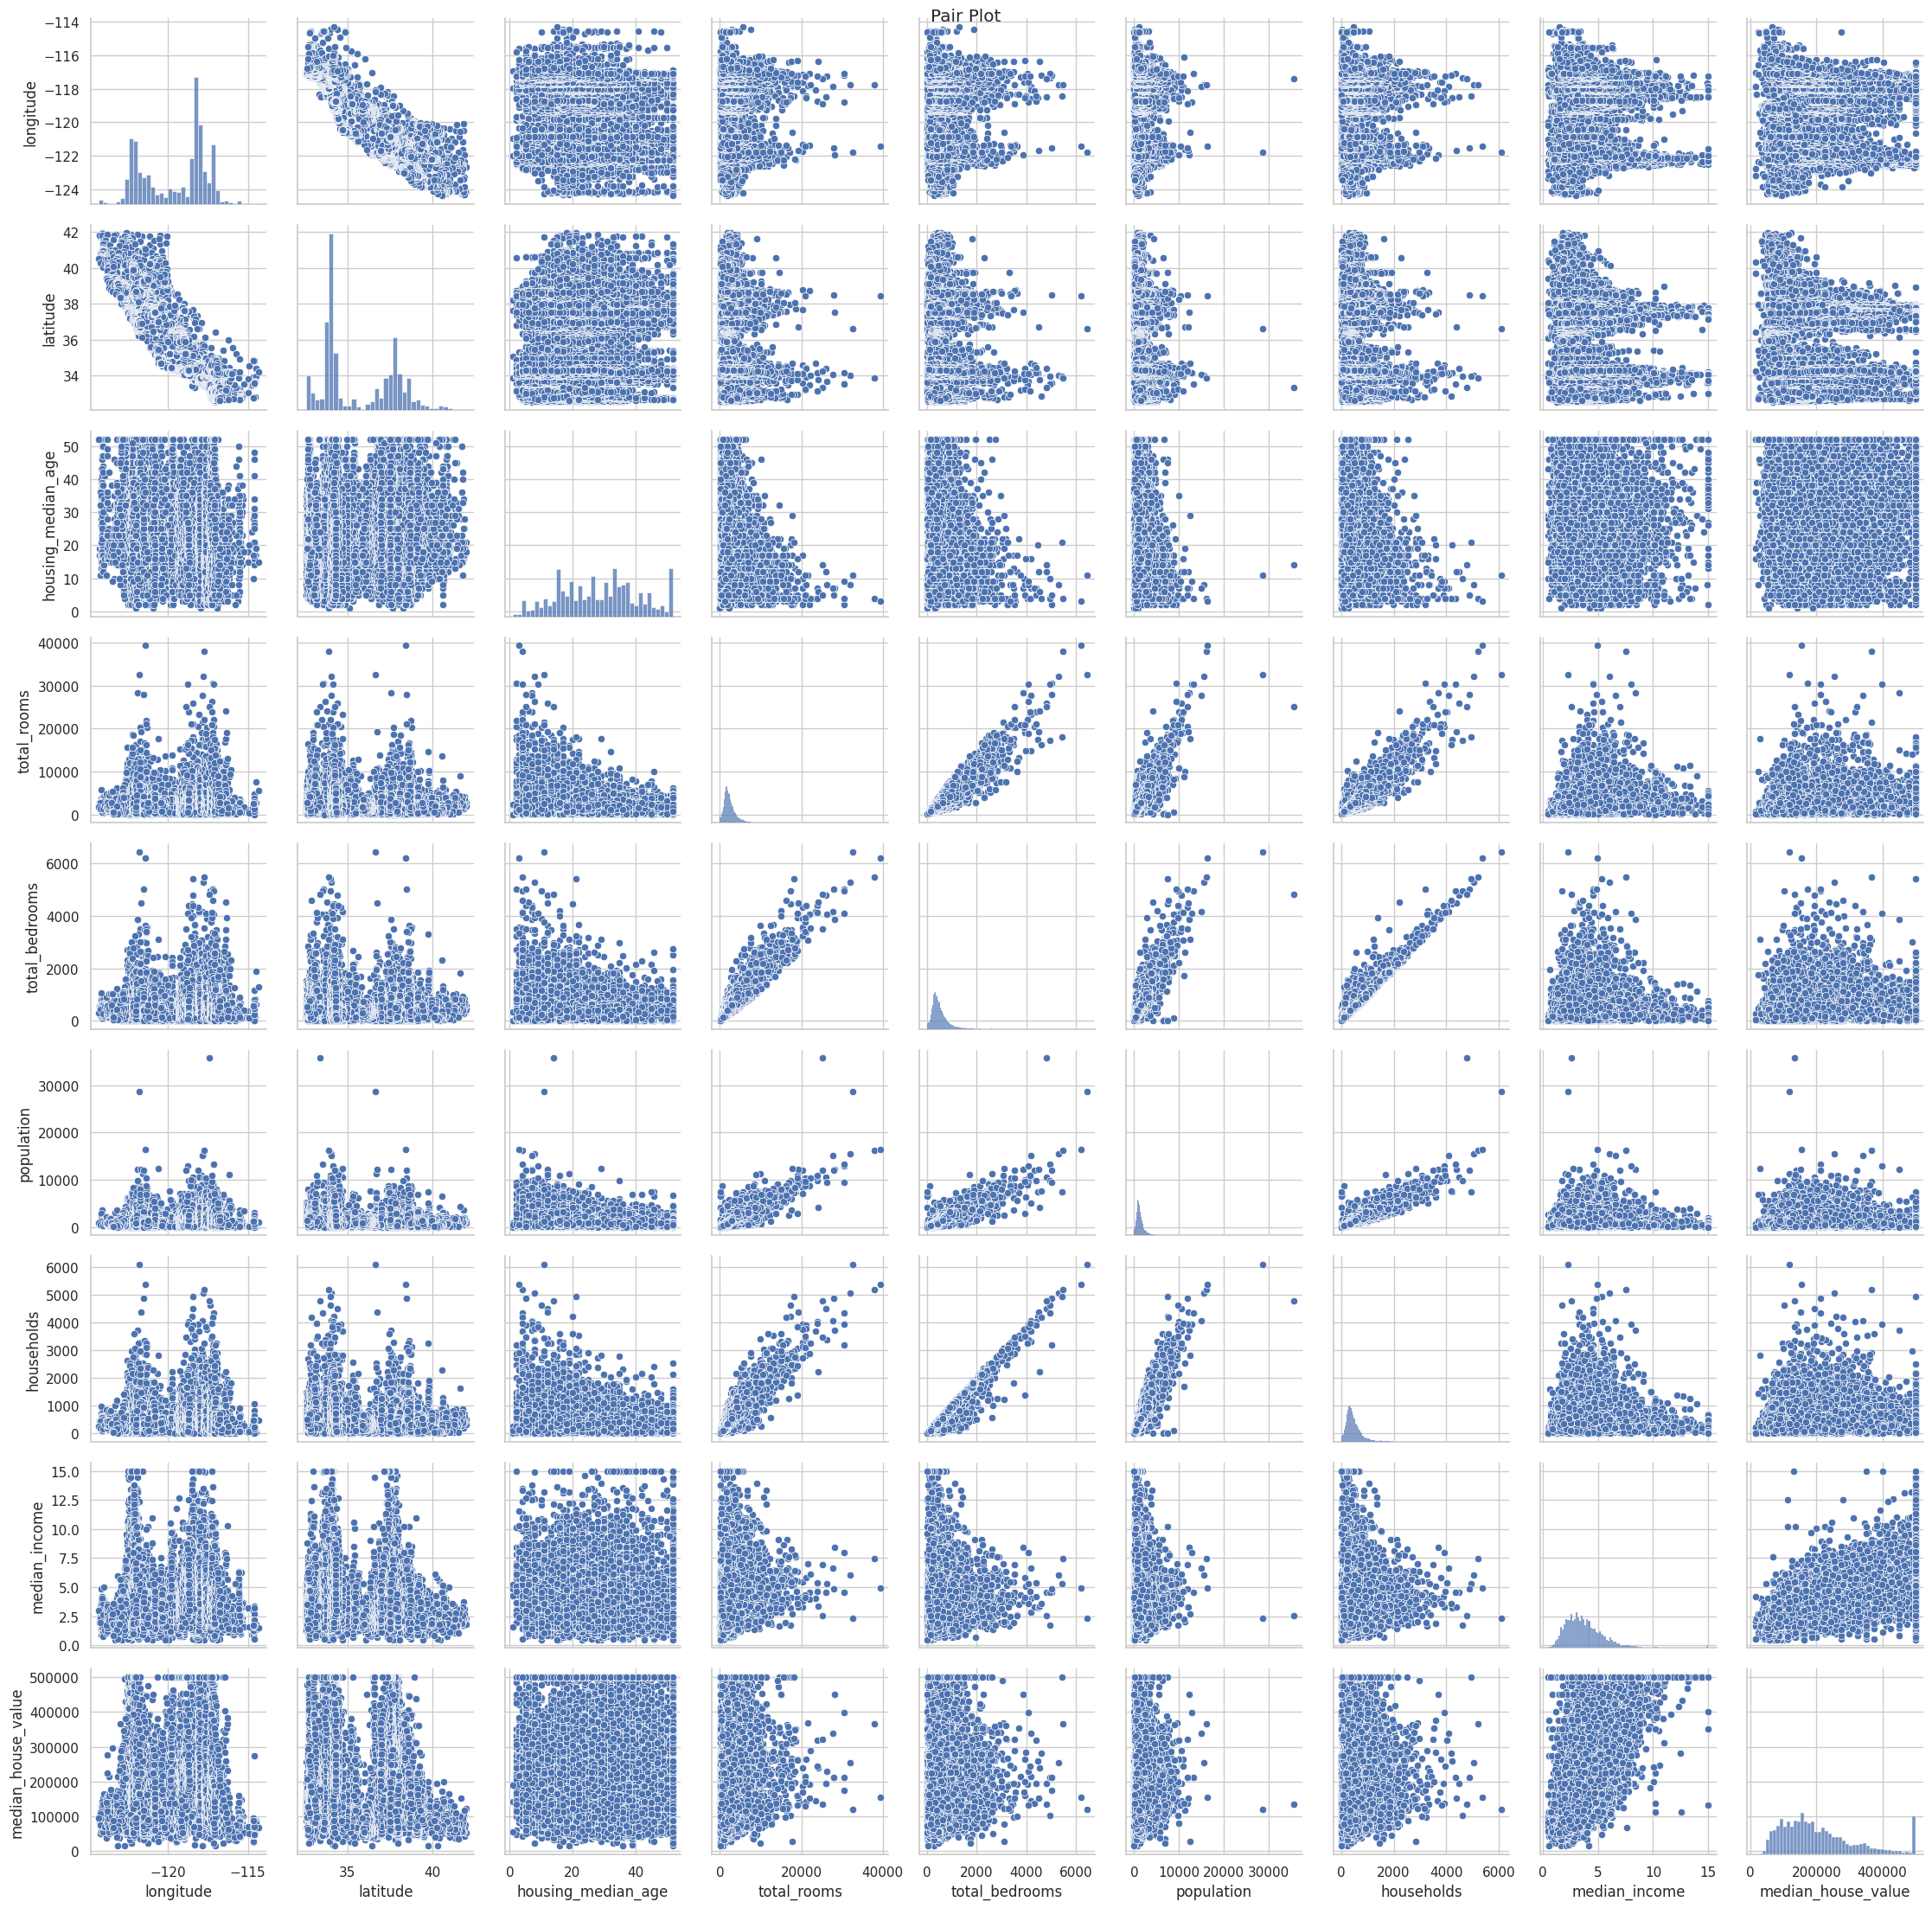

In [ ]:
# Pair plot
sns.pairplot(housing_data, vars=numeric_columns)
plt.suptitle('Pair Plot')
plt.tight_layout()
plt.show()

The pair plot shows the relationships between multiple variables in a dataset. Each scatter plot shows the relationship between two variables, and the diagonal plots show the distribution of each variable. Here are the key insights from the pair plot:

Variable Distributions:

The diagonal plots show the histograms for each variable.
longitude and latitude show distinct bimodal distributions, indicating two main geographical clusters.
median_income has a right-skewed distribution, with most values concentrated at the lower end and fewer high-income areas.
median_house_value also shows a right-skewed distribution with a noticeable cap around 500,000, likely indicating a data truncation.
Strong Positive Correlations:

total_rooms vs. total_bedrooms: The scatter plot shows a strong positive linear relationship, meaning areas with more total rooms tend to have more total bedrooms.
total_rooms vs. households: Another strong positive correlation, indicating that areas with more rooms also have more households.
total_bedrooms vs. households: A strong positive correlation, suggesting that more bedrooms correlate with more households.
population vs. households: Areas with higher populations tend to have more households.
Median Income and House Value:

median_income vs. median_house_value: There is a positive correlation, meaning higher income areas tend to have higher house values. The scatter plot also shows a cap at the 500,000 house value, reinforcing the idea of data truncation.
Latitude and Longitude:

latitude vs. longitude: The scatter plot shows a clear negative correlation, suggesting geographical clustering.
Weak or No Correlations:

Several pairs of variables show weak or no significant correlation, indicated by scattered plots without any discernible pattern.
Examples include latitude vs. median_house_value and longitude vs. median_house_value, indicating that geographical location by itself (latitude or longitude) has a weak direct correlation with house values.
Cluster Patterns:

Some scatter plots show cluster patterns, such as in the latitude vs. total_rooms plot, which may indicate different regions or areas with distinct characteristics.
Overall, the pair plot provides a comprehensive view of the relationships and distributions of the variables, helping to identify which variables are strongly correlated, the nature of these correlations, and the distribution patterns of the data.

This creates a box plot to show the distribution of median house values across different ocean proximity categories.

In [ ]:
scl = [ [0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
    [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"] ]
fig = px.box(housing_data, x="ocean_proximity", y="median_house_value",  title='<b>Median House Value vs Ocean Proximity', color='ocean_proximity')
fig.update_layout(title_x=0.5, yaxis_title = 'Median House Value', xaxis_title = 'Ocean Proximity')
fig.show()

The box plots visualizes the distribution of median house values across different categories of ocean proximity. Here are the key insights from the box plot:

Distribution of Median House Values:

NEAR BAY: The median house value is around 300k, with values ranging from just above 100k to the cap of 500k. The distribution is relatively spread out.
1H OCEAN: The median house value is around 200k, with a narrower range of values compared to NEAR BAY. The upper whisker reaches the 500k cap, and there are some outliers beyond this range.
INLAND: The median house value is around 100k, with a more compact distribution. The majority of the values fall below 200k, and there are several outliers reaching up to the 500k cap.
NEAR OCEAN: The median house value is around 300k, similar to NEAR BAY, but with a slightly wider range. The values spread from just above 100k to the 500k cap.
ISLAND: The median house value is around 300k, with a range similar to NEAR BAY and NEAR OCEAN. The distribution is relatively narrow, with the upper whisker reaching the 500k cap.
Comparing Median Values:

Properties NEAR BAY, NEAR OCEAN, and on ISLANDS tend to have higher median house values, around 300k.
Properties located 1H OCEAN and INLAND have lower median house values, with INLAND having the lowest median at around 100k.
Range and Outliers:

The box plots for NEAR BAY, NEAR OCEAN, and ISLAND have similar ranges, with many house values capped at 500k.
The 1H OCEAN and INLAND categories show narrower interquartile ranges, indicating less variability in house values.
Outliers are present in all categories, particularly INLAND, indicating some houses have significantly higher values compared to the median.
Data Cap:

The presence of a cap at 500k in all categories suggests a possible limitation or truncation in the dataset, affecting the upper limit of house values.
Overall, the box plot highlights the variation in median house values based on proximity to the ocean, with properties closer to the ocean or bay generally having higher values, while those further inland have lower values.

This section creates a bar chart to visualize the counts of different ocean proximity categories, with additional annotations explaining each category.

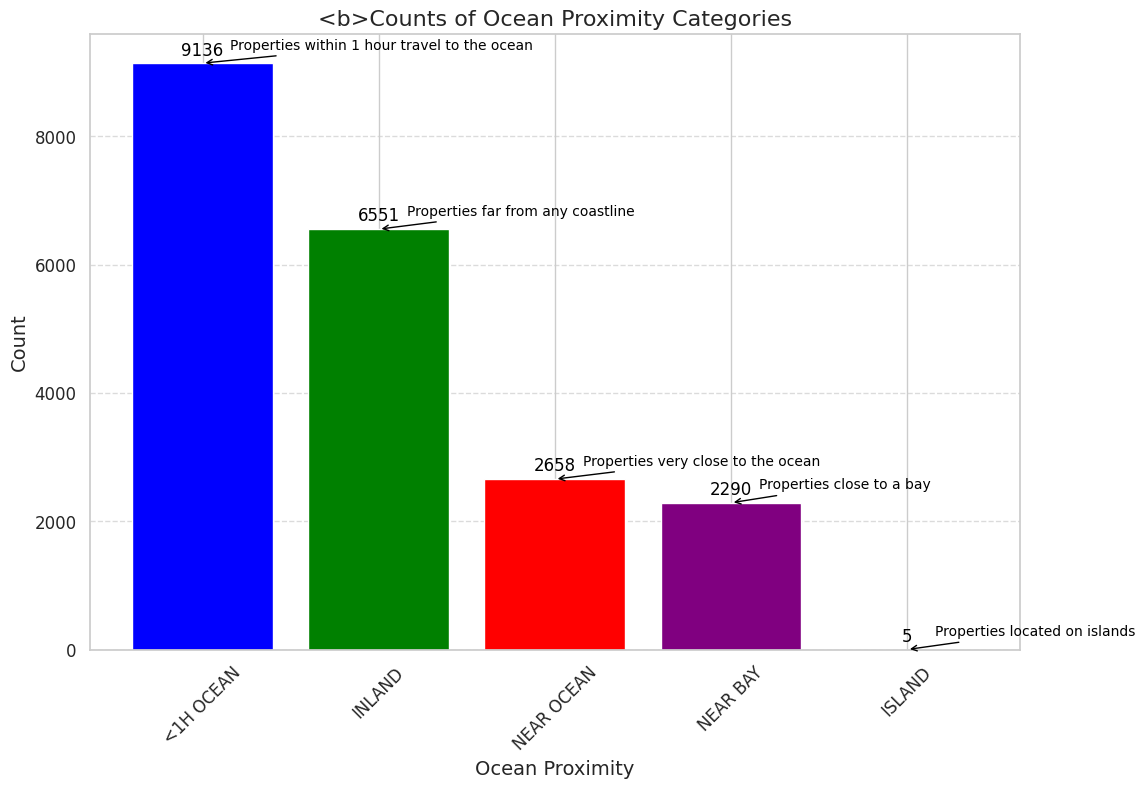

In [ ]:
# Calculate the count of each category in 'ocean_proximity'
proximity_counts = housing_data['ocean_proximity'].value_counts()

# Prepare data for plotting
proximity_df = pd.DataFrame({'Category': proximity_counts.index, 'Count': proximity_counts.values})

# Plot bar chart for ocean proximity categories
fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.bar(proximity_df['Category'], proximity_df['Count'], color=['blue', 'green', 'red', 'purple', 'orange'])

# Add labels above each bar for clarity
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom', fontsize=12, color='black')

# Customize plot
ax.set_title('<b>Counts of Ocean Proximity Categories', fontsize=16)
ax.set_xlabel('Ocean Proximity', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.tick_params(axis='x', rotation=45, labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

# Add annotations to explain the categories
annotations = {
    '<1H OCEAN': 'Properties within 1 hour travel to the ocean',
    'INLAND': 'Properties far from any coastline',
    'NEAR OCEAN': 'Properties very close to the ocean',
    'NEAR BAY': 'Properties close to a bay',
    'ISLAND': 'Properties located on islands'
}

for category, text in annotations.items():
    ax.annotate(text, xy=(proximity_df.loc[proximity_df['Category'] == category].index[0],
                          proximity_df.loc[proximity_df['Category'] == category, 'Count'].values[0]),
                xytext=(20, 10), textcoords='offset points', arrowprops=dict(arrowstyle='->', color='black'),
                fontsize=10, color='black')

plt.show()

The bar chart shows the distribution of properties across different categories of ocean proximity. Here are the key insights from the chart:

Most Common Proximity Category:

The most common category is properties within 1 hour travel to the ocean (<1H OCEAN), with a count of 9136 properties. This suggests that a significant portion of the dataset consists of properties located relatively close to the ocean.
Least Common Proximity Category:

The least common category is properties located on islands (ISLAND), with only 5 properties. This indicates that island properties are rare in this dataset.
Other Categories:

Properties far from any coastline (INLAND) are also quite common, with 6551 properties. This is the second most frequent category, indicating a substantial number of properties that are not near the ocean or bay.
Properties very close to the ocean (NEAR OCEAN) number 2658, indicating a smaller but still significant number of properties with immediate ocean proximity.
Properties close to a bay (NEAR BAY) have a count of 2290, showing that this is a less common but still notable category.
Relative Distribution:

The chart indicates that the majority of properties are either within 1 hour travel to the ocean or far from any coastline, with fewer properties very close to the ocean or a bay.
The presence of only a handful of island properties suggests that such locations are either less developed or less represented in the dataset.
Overall, the bar chart provides a clear overview of how properties are distributed across different ocean proximity categories, with the majority being relatively close to the ocean and a significant number being inland. This distribution can help understand the geographical spread of the properties in the dataset.

This section generates box plots for numerical features to identify and visualize outliers in the dataset.

In [ ]:
# List of numerical features to check for outliers
numerical_features = ['housing_median_age', 'total_rooms', 'total_bedrooms',
                      'population', 'households', 'median_income', 'median_house_value']

# Calculate the number of rows needed (2 columns layout)
num_features = len(numerical_features)
num_cols = 2
num_rows = (num_features // num_cols) + int(num_features % num_cols != 0)

# Create a subplot figure with the calculated number of rows and 2 columns
fig = make_subplots(rows=num_rows, cols=num_cols, subplot_titles=numerical_features)

# Add box plots to each subplot
for i, feature in enumerate(numerical_features):
    row = (i // num_cols) + 1
    col = (i % num_cols) + 1
    fig.add_trace(
        go.Box(y=housing_data[feature], name=feature),
        row=row, col=col
    )

# Update layout for better spacing
fig.update_layout(
    height=400 * num_rows, width=800,
    title_text="Box Plots of Numerical Features to Identify Outliers",
    showlegend=False
)

fig.show()


This function removes outliers from the dataset using the Interquartile Range (IQR) method. It then displays the shape of the dataset before and after removing outliers.

In [ ]:
# Function to remove outliers using IQR
def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# List of numerical features to check for outliers
numerical_features = ['housing_median_age', 'total_rooms', 'total_bedrooms',
                      'population', 'households', 'median_income', 'median_house_value']

# Remove outliers from the housing data
housing_data_cleaned = remove_outliers(housing_data, numerical_features)

# Display the shape of the dataset before and after removing outliers
print("Original data shape:", housing_data.shape)
print("Cleaned data shape:", housing_data_cleaned.shape)

Original data shape: (20640, 10)
Cleaned data shape: (16725, 10)


In [ ]:
# Check the cleaned dataset
housing_data_cleaned.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  16725.000000  16725.000000        16725.000000  16725.000000   
mean    -119.615230     35.716213           29.656622   2071.818296   
std        2.005515      2.173725           12.218930   1024.143588   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.790000     33.940000           19.000000   1348.000000   
50%     -118.710000     34.410000           30.000000   1932.000000   
75%     -118.030000     37.750000           38.000000   2685.000000   
max     -114.490000     41.950000           52.000000   5688.000000   

       total_bedrooms    population    households  median_income  \
count    16725.000000  16725.000000  16725.000000   16725.000000   
mean       426.704634   1148.766517    399.271749       3.577796   
std        200.473017    548.697330    185.945188       1.446608   
min          2.000000      3.000000      2.000000       0.499900   
25%        282.000000    753.000000    267.000000       2.482100   
50%        401.000000   1086.000000    379.000000       3.395800   
75%        555.000000   1504.000000    520.000000       4.500000   
max       1053.000000   2717.000000    906.000000       8.015800   

       median_house_value  
count        16725.000000  
mean        185334.899611  
std          92032.935991  
min          14999.000000  
25%         112500.000000  
50%         169200.000000  
75%         240300.000000  
max         457800.000000

**Check for outlier after removal**

In [ ]:
# List of numerical features to check for outliers
numerical_features = ['housing_median_age', 'total_rooms', 'total_bedrooms',
                      'population', 'households', 'median_income', 'median_house_value']

# Calculate the number of rows needed (2 columns layout)
num_features = len(numerical_features)
num_cols = 2
num_rows = (num_features // num_cols) + int(num_features % num_cols != 0)

# Create a subplot figure with the calculated number of rows and 2 columns
fig = make_subplots(rows=num_rows, cols=num_cols, subplot_titles=numerical_features)

# Add box plots to each subplot
for i, feature in enumerate(numerical_features):
    row = (i // num_cols) + 1
    col = (i % num_cols) + 1
    fig.add_trace(
        go.Box(y=housing_data_cleaned[feature], name=feature),
        row=row, col=col
    )

# Update layout for better spacing
fig.update_layout(
    height=400 * num_rows, width=800,
    title_text="Box Plots of Numerical Features to Identify Outliers",
    showlegend=False
)

fig.show()


**Majority of the outliers have been removed.**

### **Step 3: Data Preprocessing**

This step removes rows with null values in the 'total_bedrooms' column and checks for any remaining null values.

In [ ]:
# Remove rows with null values in 'total_bedrooms'
housing_data_cleaned.dropna(subset=['total_bedrooms'], inplace=True)

In [ ]:
# Check if there are null values now
housing_data_cleaned.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

### **Step 4: Feature Engineering**

This code creates new features by deriving additional metrics from existing columns.

In [ ]:
# Feature creation
housing_data_cleaned['rooms_per_household'] = housing_data_cleaned['total_rooms'] / housing_data_cleaned['households']
housing_data_cleaned['bedrooms_per_room'] = housing_data_cleaned['total_bedrooms'] / housing_data_cleaned['total_rooms']
housing_data_cleaned['population_per_household'] = housing_data_cleaned['population'] / housing_data_cleaned['households']

This line performs one-hot encoding on the categorical 'ocean_proximity' column to convert it into numerical format.

In [ ]:
# Encoding categorical variables
housing_data = pd.get_dummies(housing_data_cleaned, columns=['ocean_proximity'], drop_first=True)

This code scales the numerical features using StandardScaler to standardize the data.

In [ ]:
# Scaling numerical features
numerical_features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms',
                      'population', 'households', 'median_income', 'rooms_per_household',
                      'bedrooms_per_room', 'population_per_household']

In [ ]:
scaler = StandardScaler()
housing_data[numerical_features] = scaler.fit_transform(housing_data[numerical_features])

This line creates an interaction feature by multiplying 'median_income' with 'total_rooms'.

In [ ]:
# Create interaction features
housing_data['income_times_rooms'] = housing_data['median_income'] * housing_data['total_rooms']

In [ ]:
# Apply PCA
#pca = PCA(n_components=10)  # Adjust the number of components as needed
#principal_components = pca.fit_transform(housing_data[numerical_features])
#principal_df = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1, 11)])

# Add principal components back to the dataframe
#housing_data = pd.concat([housing_data.reset_index(drop=True), principal_df], axis=1)

# Display the first few rows of the transformed dataset
housing_data.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
2  -1.308815  0.981656            1.828642    -0.590578       -1.180766   
3  -1.313802  0.981656            1.828642    -0.779033       -0.956290   
4  -1.313802  0.981656            1.828642    -0.434345       -0.731814   
5  -1.313802  0.981656            1.828642    -1.125675       -1.066034   
6  -1.313802  0.977055            1.828642     0.452276        0.310751   

   population  households  median_income  median_house_value  \
2   -1.189701   -1.195397       2.543685            352100.0   
3   -1.076703   -0.969518       1.427730            341300.0   
4   -1.063945   -0.754394       0.185546            342200.0   
5   -1.340973   -1.109348       0.317306            269700.0   
6   -0.099815    0.617019       0.056205            299200.0   

   rooms_per_household  bedrooms_per_room  population_per_household  \
2             1.300252          -1.545828                 -0.152851   
3             0.212818          -0.546769                 -0.400366   
4             0.417253          -0.771566                 -0.757045   
5            -0.251811           0.313600                 -0.797504   
6            -0.176882          -0.393280                 -0.808689   

   ocean_proximity_INLAND  ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
2                   False                   False                      True   
3                   False                   False                      True   
4                   False                   False                      True   
5                   False                   False                      True   
6                   False                   False                      True   

   ocean_proximity_NEAR OCEAN  income_times_rooms  
2                       False           -1.502244  
3                       False           -1.112250  
4                       False           -0.080591  
5                       False           -0.357184  
6                       False            0.025420

**Feature Vector and Target Variable**

This code separates the features (X) and the target variable (y) from the dataset.

In [ ]:
# Set up the feature vector (X) and target (y)
X = housing_data.drop('median_house_value', axis=1)
y = housing_data['median_house_value']

### **Step 5: Training the model, Evaluation**

**Training and Test Data**

This code splits the dataset into training and testing sets, with 80% for training and 20% for testing, and prints their shapes.

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (13380, 16)
X_test shape: (3345, 16)
y_train shape: (13380,)
y_test shape: (3345,)


**MPLRegressor**

This section trains a neural network regressor (MLPRegressor) with specific hyperparameters, evaluates it, and prints the performance metrics.

**MLPRegressor** used in the code is a type of Multi-Layer Perceptron (MLP), which is a class of feedforward artificial neural network. It consists of multiple layers of neurons, including an input layer, one or more hidden layers, and an output layer. Each neuron in one layer is connected to every neuron in the next layer, and the network is trained using backpropagation.

**Creating the MLP Model**: We initialize the MLPRegressor with specific hyperparameters:

hidden_layer_sizes=(100, 50): This specifies the neural network architecture with two hidden layers, the first with 100 neurons and the second with 50 neurons.

activation='relu': This sets the activation function to ReLU (Rectified Linear Unit), which introduces non-linearity to the model.

solver='adam': Adam is an optimization algorithm used for training the model.

max_iter=5000: This sets the maximum number of iterations for the solver to 5000.

random_state=42: This ensures reproducibility by setting a seed for the random number generator.

learning_rate_init=0.001: This sets the initial learning rate for the training process.

early_stopping=True: This enables early stopping to terminate training when performance on a validation set stops improving.

validation_fraction=0.1: This reserves 10% of the training data for validation to monitor overfitting.

n_iter_no_change=100: Training stops if the validation score does not improve for 100 consecutive iterations.

In [ ]:
from sklearn.neural_network import MLPRegressor

# Create an MLP model with adjusted hyperparameters
model_mlp = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam',
                     max_iter=5000, random_state=42, learning_rate_init=0.001,
                     early_stopping=True, validation_fraction=0.1, n_iter_no_change=100)

# Train the model
model_mlp.fit(X_train, y_train)

# Evaluate the model
score_mlp = model_mlp.score(X_test, y_test)

# Predict on the test set
y_pred_mlp = model_mlp.predict(X_test)

# Calculate metrics
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)

**Results**

In [ ]:
# Print metrics
print(f"Mean Squared Error: {mse_mlp}")
print(f"R^2 Score: {r2_mlp}")
print(f"Model Score: {score_mlp}")

Mean Squared Error: 2050036259.1237988
R^2 Score: 0.7525197991475643
Model Score: 0.7525197991475643


**Training the MLP Model**: The MLPRegressor is trained on the training data (X_train, y_train).

**Evaluating the Model**: The model's performance is evaluated using the test data (X_test, y_test). Metrics such as Mean Squared Error (MSE) and R² score are printed to assess the model's accuracy.

**Prediction vs. Actual Plot**: A scatter plot is generated to visualize the relationship between actual and predicted values. The diagonal line represents perfect predictions, and the scatter points show how the model's predictions compare to the actual values.

**Residuals Plot**: Another scatter plot is created to visualize the residuals (differences between actual and predicted values) against the predicted values. The horizontal line at zero represents perfect predictions, and the scatter points show the distribution of residuals.

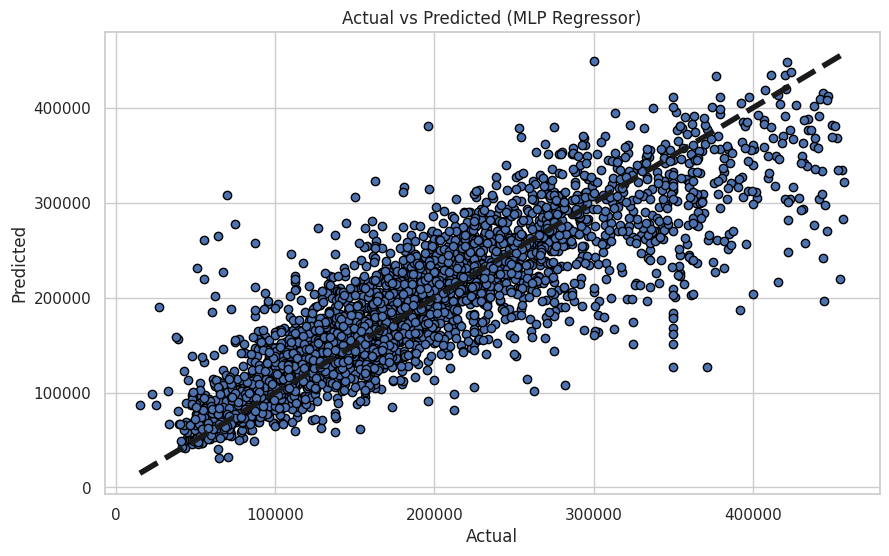

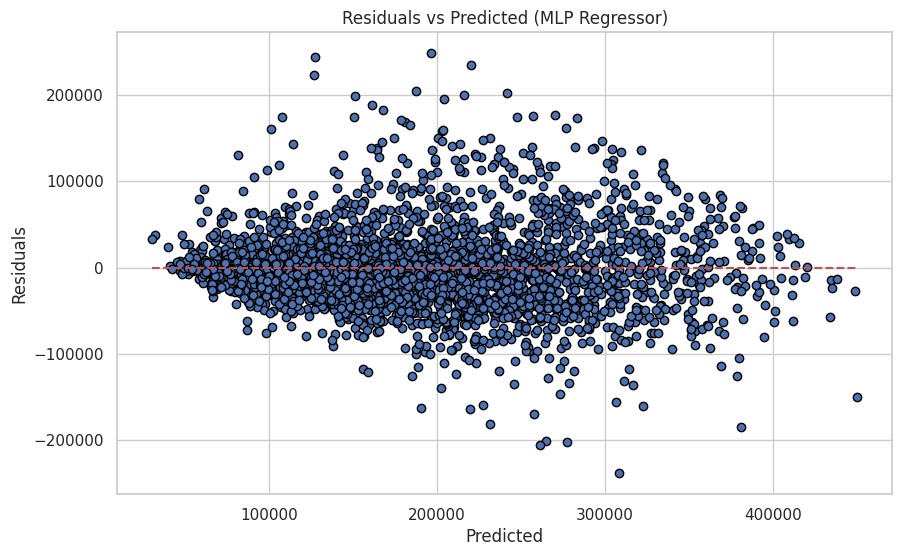

In [ ]:
# Plot Prediction vs. Actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_mlp, edgecolors=(0, 0, 0))
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=4)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted (MLP Regressor)")
plt.show()

# Plot Residuals
residuals_mlp = y_test - y_pred_mlp

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_mlp, residuals_mlp, edgecolors=(0, 0, 0))
plt.hlines(0, min(y_pred_mlp), max(y_pred_mlp), colors='r', linestyles='dashed')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted (MLP Regressor)")
plt.show()

In [ ]:
# Create a DataFrame to store actual and predicted values
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_mlp})

# Display the DataFrame
print(results_df.head())

         Actual      Predicted
15857  208300.0  254653.049413
19575   87500.0   86791.402207
18938  197700.0  247711.660146
3030    69800.0  103567.292293
8476   188000.0  216222.073495


**Explainability**

In [ ]:
# Install LIME
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=e6d36bcb5ff4eb3881f759a7afb938e76d9b24433519ce93ea96ba75c9d193f7
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


### **Explainability**

In [ ]:
from lime import lime_tabular

# Create LIME explainer
explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=['median_house_value'],
    mode='regression'
)

# Choose an instance to explain
i = 0  # You can change this index to any instance you want to explain
exp = explainer.explain_instance(
    data_row=X_test.iloc[i],
    predict_fn=model_mlp.predict,
    num_features=16  # You can adjust this to ensure more features are displayed
)

# Print the explanation
print(exp.as_list())

# Visualize the explanation
exp.show_in_notebook(show_table=True)


[('latitude > 0.93', -128817.5372156615), ('ocean_proximity_INLAND <= 0.00', -80569.27223611821), ('ocean_proximity_ISLAND <= 0.00', -72205.51182529764), ('ocean_proximity_NEAR BAY > 0.00', 68294.16016172069), ('longitude <= -1.08', 66260.80968049739), ('total_bedrooms <= -0.72', -29786.7941351626), ('total_rooms <= -0.71', 27081.856335480545), ('rooms_per_household <= -0.39', -20511.209666254712), ('ocean_proximity_NEAR OCEAN <= 0.00', -14015.252208974172), ('-0.49 < population_per_household <= -0.12', 13305.684299886349), ('housing_median_age > 0.68', 12228.320633316702), ('income_times_rooms <= -0.18', -8347.911965457854), ('bedrooms_per_room > 0.45', -8051.342577087702), ('households <= -0.71', 6409.591178463596), ('-0.12 < median_income <= 0.64', 6298.142376479571), ('population <= -0.72', 2167.18351024618)]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but MLPRegressor was fitted with feature names



**Random Forest Regressor**

This code trains a Random Forest Regressor model, makes predictions, evaluates the model using metrics like MSE and R^2, and visualizes feature importance, actual vs. predicted values, and residuals.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)
score_rf = model_rf.score(X_test, y_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
# Predict on the test set
y_pred_rf = model_rf.predict(X_test)

# Calculate metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

In [ ]:
# Print metrics
print('RESULTS FOR RANDOM FOREST:\n')
print(f"Mean Squared Error: {mse_rf}")
print(f"R^2 Score: {r2_rf}")
print(f"Model Score: {score_rf}")

RESULTS FOR RANDOM FOREST:

Mean Squared Error: 1760371592.3470707
R^2 Score: 0.7874880928032082
Model Score: 0.7874880928032082
